Econ Probset 3

Overlapping Generations Models

Rick Evans

Kendra Robbins 

In [225]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Exercise 2.1

In [17]:
nvec = np.array([1,1,.2])
A=1
alpha = .35
delta = .05
beta = .96
sigma = 3

In [34]:
f_params = (nvec, A, alpha, delta) 

def feasible(f_params, bvec_guess): 

    nvec, A, alpha, delta = f_params
    
    K_cnstr = False 
    c_cnstr = [False, False, False] 
    b_cnstr = [False, False] 


    K = bvec_guess.sum()  
    L = nvec.sum() 
    
    w = (1-alpha)*A*(K/L)**alpha #equilibrium wage, equation 2.25
    r = alpha*A*(L/K)**(1-alpha)-delta #equilibrium interest rate, 2.26
      
        
    
    #using equations 2.3, 2.4, 2.5:
    c_vec = np.zeros((3,1))
    c_vec[0] = w*nvec[0] - bvec_guess[0]
    c_vec[1] = w*nvec[1] + (1+r)*bvec_guess[0] - bvec_guess[1]
    c_vec[2] = w*nvec[2] + (1+r)*bvec_guess[1]


    
    if K<=0:
        K_cnstr = True
        print("Capital is not positive")
        
    #update c_cnstr:
    if c_vec[0]<=0:
        c_cnstr[0] = True
    if c_vec[1]<=0:
        c_cnstr[1]=True
    if c_vec[2]<=0:
        c_cnstr[2]=True 
        
        
    #update b_cnstr:
    if c_cnstr[0] == True:
        b_cnstr[0] = True
    if c_cnstr[1]==True:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2] == True:
        b_cnstr[1]=True
        
        
        
    return b_cnstr, c_cnstr, K_cnstr

In [24]:
#a:

bvec_guess = np.array([1,1.2])
feasible(f_params, bvec_guess)


([True, False], [True, False, False], False)

In [31]:
#b:
bvec_guess = np.array([.06,-.001])
feasible(f_params, bvec_guess)

([False, False], [False, False, False], False)

In [30]:
#c:
bvec_guess = np.array([.1,.1])
feasible(f_params, bvec_guess)

([False, False], [False, False, False], False)

For a, the constraint that c1 must be positive is violated. 

For b and c, no constraints are violated. 

In [35]:
a=np.array([.01,.02])
b = np.array([.07,.1])
c = np.array([.04,.001])

In [36]:
feasible(f_params,a)

([False, False], [False, False, False], False)

In [37]:
feasible(f_params,b)

([False, False], [False, False, False], False)

In [38]:
feasible(f_params,c)

([False, False], [False, False, False], False)

## Exercise 2.2

In [4]:
import time
import scipy.optimize as opt
from matplotlib import pyplot as plt

In [20]:
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35
L = 2.2

f_params_21 = (L, A, alpha, delta)
eul_args_22 = (beta, sigma, L, A, alpha, delta)

In [42]:
def Eul_error(bvec_guess, eul_params):
    
    beta, sigma, L, A, alpha, delta = eul_params
    
    K = bvec_guess.sum()  
    L = 2.2 
    
    w = (1-alpha)*A*(K/L)**alpha #equilibrium wage, equation 2.25
    r = alpha*A*(L/K)**(1-alpha)-delta #equilibrium interest rate, 2.26
      
        
    
    #using budget constraint equations 2.3, 2.4, 2.5:
    c1 = w - bvec_guess[0]
    c2 = w + (1+r)*bvec_guess[0] - bvec_guess[1]
    c3 = .2*w + (1+r)*bvec_guess[1]

    
    if c1 <= 1e-6:
        Uprime1 = 1e8
    else:
        Uprime1 = c1**(-sigma)
    
    if c2 <= 1e-6:
        Uprime2 = 1e8
    else:
        Uprime2 = c2**(-sigma)
        
    if c3 <= 1e-6:
        Uprime3 = 1e8
    else:
        Uprime3 = c3**(-sigma)

    eul_errors = np.zeros(2)
    eul_errors[0] = beta*(1+r)*Uprime2 - Uprime1
    eul_errors[1] = beta*(1+r)*Uprime3 - Uprime2
    
    return eul_errors 

In [56]:
def get_SS(params, bvec_guess, SS_graphs=False):
    
    start_time = time.clock()
    
    beta, sigma, L, A, alpha, delta, ss_tol = params
    eul_args = beta, sigma, 2.2, A, alpha, delta 
    
    root = opt.root(Eul_error, bvec_guess, [beta, sigma, L, A, alpha, delta], tol=ss_tol)
    
    bvec = root.x
    b_ss = bvec
    
    K_ss = b_ss.sum()
    w_ss = (1-alpha)*A*(K_ss/2.2)**alpha
    r_ss = alpha*A*(2.2/K_ss)**(1-alpha)-delta
    
    c_ss = np.zeros(3)
    
    c_ss[0] = w_ss - b_ss[0]
    c_ss[1] = w_ss + (1+r_ss)*b_ss[0] - b_ss[1]
    c_ss[2] = .2*w_ss + (1+r_ss)*b_ss[1]
    
    C_ss = c_ss.sum()
    Y_ss = A*(K_ss**alpha)*L**(1-alpha)
    
    EulErr_ss = Eul_error(bvec, (beta, sigma, L, A, alpha, delta))
    
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    if SS_graphs == True:
        plt.bar(['c1', 'c2', 'c3'], c_ss)
        plt.xlabel("age")
        plt.ylabel('consumption')
        plt.show()
        
    if SS_graphs == True:
        plt.bar(['b2', 'b3'], b_ss)
        plt.xlabel("period")
        plt.ylabel('savings')
        plt.show()
        
    ss_time = time.clock() - start_time 
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, 
                 'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
                 'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
                 'ss_time': ss_time}
    
    
    return ss_output 

2.2 a & b:

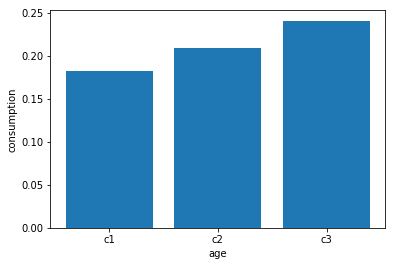

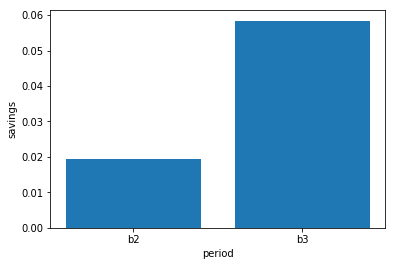

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465936076353,
 'r_ss': 2.433062283358659,
 'K_ss': 0.0777236279220895,
 'Y_ss': 0.6827603855287382,
 'C_ss': 0.6329006782167177,
 'EulErr_ss': array([ 4.50781670e-06, -8.92472291e-06]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.16841099999999987}

In [57]:
params = beta, sigma, 2.2, A, alpha, delta, 0.00001
get_SS(params, [.1,.1],SS_graphs=True)

2.2 c:

Savings increases and consumption in period 3 increases.

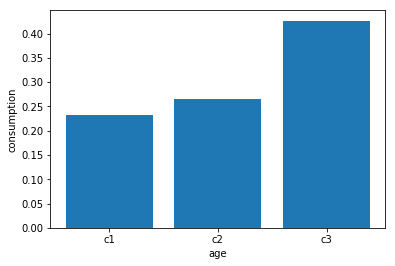

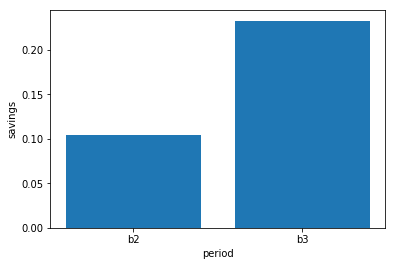

{'b_ss': array([0.10461281, 0.23277231]),
 'c_ss': array([0.23260421, 0.26581261, 0.42650055]),
 'w_ss': 0.3372170233087267,
 'r_ss': 0.5425251808594584,
 'K_ss': 0.3373851166541525,
 'Y_ss': 1.1413499250449213,
 'C_ss': 0.9249173727112824,
 'EulErr_ss': array([-79.4592382 , -53.24418698]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.17009200000000035}

In [58]:
params = .55**20, sigma, 2.2, A, alpha, delta, 0.00001
get_SS(params, [.1,.1],SS_graphs=True)

## Exercise 2.3

In [248]:
T = 40
path_toler = 1e-9
xi = 0.2
L = 2.2
A = 1
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35
n_vec = np.array([1.0, 1.0, 0.2])
tol = 1e-9

In [249]:
params = beta, sigma, L, A, alpha, delta, ss_tol 
bvec_guess = np.array([.1,.1])

output_ss = get_SS(params, bvec_guess)
b2bar = output_ss['b_ss'][0]
b3bar = output_ss['b_ss'][1]
b_ss = np.array([b2bar, b3bar])

bvec_initial = np.zeros(2)
b21 =.8*b2bar
b31 = 1.1*b3bar
bvec_initial[0] = b21
bvec_initial[1] = b31


K path

In [250]:
Kbar = b2bar + b3bar
K1 = b21 + b31
Kpath = np.linspace(K1, Kbar, T)
Kpath = np.append(Kpath, Kbar)


w path and r path:

In [251]:
def get_rw_paths(T, Kpath, Kbar, rw_params):

    A, alpha, delta = rw_params 

    rpath = np.zeros(T)
    wpath = np.zeros(T)

    for i in range(T):
        wpath[i] = (1-alpha)*A*(Kpath[i]/2.2)**alpha
        rpath[i] = alpha*A*(2.2/Kpath[i])**(1-alpha)-delta
    
    wbar = (1-alpha)*A*(Kbar/2.2)**alpha
    rbar = alpha*A*(2.2/Kbar)**(1-alpha)-delta
    
    rpath = np.append(rpath, rbar)
    wpath = np.append(wpath, wbar)
    
    return rpath, wpath 

b32 Euler error:

In [252]:
def b32_eulererror(b32, b32_params): 
    
    b21, b22, rpath, wpath, params = b32_params 

    
    # using equation 2.31:
    c1 = (1 + rpath[0]) * b21 + wpath[0] - b32
    
    if c1 <= 1e-6:
        Uprime1 = 1e8
    else:
        Uprime1 = c1**(-sigma)
    
    c2 = (1 + rpath[1]) * b32 + .2*wpath[1]
    
    if c2 <= 1e-6:
        Uprime2 = 1e8
    else:
        Uprime2 = c2**(-sigma)
        
    
    eulererror = Uprime1  - beta*(1+rpath[1])*Uprime2
     
    
    return eulererror 
  
    

solve for b32:

In [253]:
def get_b32(b21, b22, rpath, wpath, params, bvec_initial):
        
    b32_params = [b21, b22, rpath, wpath, params]    
    result = opt.root(b32_eulererror, 
                      bvec_initial[0], 
                      args = b32_params,
                      tol = 1e-9)
    b32 = result.x
    b32_EulErrs = result.fun
    
    return np.array([b32, b32_EulErrs])

Euler errors for b2t and b3t+1

In [254]:
def b_EulErr(b, b_params):
    
    t, rpath, wpath, params = b_params
    
    b2 = b[0]
    b3 = b[1]
    t = b_params[0]
    rpath  = b_params[1]
    wpath  = b_params[2]
    params = b_params[3]
    
    
    c21 = wpath[t] - b2
    c22 = (1 + rpath[t+1]) * b[0] + wpath[t+1] - b3


    if c21 <= 1e-6:
        Uprime21 = 1e8
    else:
        Uprime21 = c21**(-sigma)
        
    if c22 <= 1e-6:
        Uprime22 = 1e8
    else:
        Uprime22 = c22**(-sigma)
    
    b2_Eulerr = Uprime21 - beta * (1 + rpath[t+1]) * Uprime22
    
    c31 = (1 + rpath[t+1]) * b2 + wpath[t+1] - b3
    c32 = (1 + rpath[t+2]) * b3 + wpath[t+2] 
    
    if c31 <= 1e-6:
        Uprime31 = 1e8
    else:
        Uprime31 = c31**(-sigma)
        
    if c21 <= 1e-6:
        Uprime32 = 1e8
    else:
        Uprime32 = c32**(-sigma)
    
    b3_Eulerr = Uprime31 - beta * (1 + rpath[t+2]) * Uprime32
    
    return np.array([b2_Eulerr, b3_Eulerr])

In [257]:
def get_b(t, rpath, wpath, params, bvec_initial):
    
    b_params = [t, rpath, wpath, params]
    result = opt.root(b_EulErr, bvec_initial, 
                      args = (b_params), tol = ss_tol)
    b = result.x
    b_Eulerrs = result.fun
    
    return np.array([b, b_Eulerrs])

In [258]:
def aggregate_errs(Kpath, rpath, wpath, bmat, ag_params):
   
    alpha, A,delta= ag_params 
    
    L = 2.2
    C = L * wpath[:-1] + (1 + rpath[:-1]) * bmat[:-1,0] - bmat[1:,0] + (1 + rpath[:-1]) * bmat[:-1,1] - bmat[1:,1]
    Y = A * (Kpath[:-1]**alpha) * L**(1 - alpha)
    
    agg_err = Y - C - Kpath[1:] + (1 - delta) * Kpath[:-1]
    max_agg_err = np.abs(agg_err).max()
    
    return max_agg_err

In [259]:
def donut(T, rpath, wpath, Kpath, bvec_initial, b_ss, params):
        
    beta, sigma, nvec, L, A, alpha, delta, ss_tol = params

    bmat = np.zeros((T+1, 2))
    bmat[0,:] = bvec_initial
    EulErrs = np.zeros((T+1, 2))
    cols = [0,1]
    for t in range(T-1):
        rows = [t+1, t+2]
        bmat[rows, cols], EulErrs[rows, cols] = get_b(t, rpath, wpath, params, bvec_initial)
    
    bmat[1,1], EulErrs[1,1] = get_b32(bmat[0,0], bmat[0,1], rpath, wpath, params, bvec_initial)
    max_EulErrs = np.abs(EulErrs).max(axis = 0)
    
    ag_params = alpha, A, delta
    agg_errs = aggregate_errs(Kpath, rpath, wpath, bmat, ag_params)
    
    return bmat, max_EulErrs, agg_errs

Find Kprime

In [260]:
def Kprime(bmat, Kbar):
    
    Kprime_path = bmat[:-1,:].sum(axis = 1)
    Kprime_path = np.append(Kprime_path, Kbar)
    
    return Kprime_path

In [261]:
def TPI(T, Kpath, Kbar, bvec_initial, b_ss, params, tol, max_iter):
    
    beta, sigma, nvec, L, A, alpha, delta, ss_tol = params
    
    dist = tol + 1
    i = 0
    
    rw_params = A, alpha, delta 
    
    while (dist > tol) & (i < max_iter):
        i += 1
        rpath, wpath = get_rw_paths(T, Kpath, Kbar, rw_params)
        bmat, max_EulErrs, max_agg_errs = donut(T, rpath, wpath, Kpath, bvec_initial, b_ss, params)
        Kp_path = Kprime(bmat, Kbar)
        dist = la.norm(Kp_path - Kpath, 2)
        Kpath = xi * Kp_path + (1 - xi) * Kpath
    
    print('Max absolute Euler errors for generation 2: ', max_EulErrs[0])
    print('Max absolute Euler errors for generation 3: ', max_EulErrs[1])
    print('Max absolute aggregate resources constraint error:', max_agg_errs)
    
    return Kpath, rpath, wpath

In [262]:
nvec = np.array([1,1,.2])
params = [beta, sigma, nvec, L, A, alpha, delta, ss_tol]
kpath, rpath, wpath = TPI(T, Kpath, Kbar, bvec_initial, b_ss, params, 1e-9, 50)


Max absolute Euler errors for generation 2:  3.016793925780803e-09
Max absolute Euler errors for generation 3:  4.341927706263959e-09
Max absolute aggregate resources constraint error: 0.07295655418697332


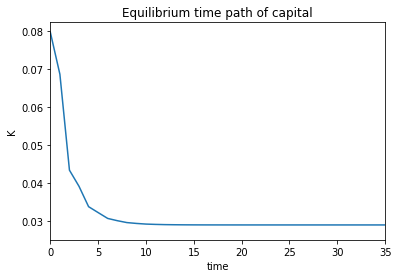

In [268]:
plt.plot(kpath)
plt.title('Equilibrium time path of capital')
plt.xlabel('time')
plt.ylabel('K')
plt.xlim(0,35)
plt.show()

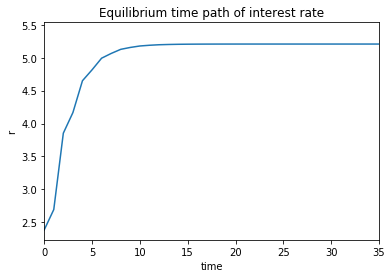

In [269]:
plt.plot(rpath)
plt.title('Equilibrium time path of interest rate')
plt.xlabel('time')
plt.ylabel('r')
plt.xlim(0,35)

plt.show()

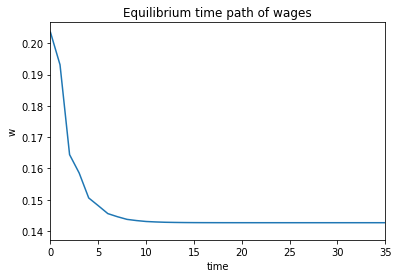

In [270]:
plt.plot(wpath)
plt.title('Equilibrium time path of wages')
plt.xlabel('time')
plt.ylabel('w')
plt.xlim(0,35)
plt.show()

In [271]:
Kstd_dist = np.abs(kpath - Kbar)
err = 1e-5
loc = np.where(Kstd_dist < err)[0]
print('Periods to get within 1e-5 of the steady state capital: ', loc.min())
loc_cons = np.ediff1d(loc) == 1
print('Periods the economy stays within 1e-5 of the steady state capital: ', loc[-len(loc_cons)])

Periods to get within 1e-5 of the steady state capital:  40
Periods the economy stays within 1e-5 of the steady state capital:  40
